# Introduction

In this notebook we will use three libraries most , in this we have done Visualization on iris dataset, we have plot many kinds of graph to get clear view of our dataset, we have use different different types of styles for making graph.

# Content

1. Inroduction
2. Contents
3. Importing important libraries
4. Reading dataset
5. Exploratory data analysis
6. Data Visualization
7. Conclusion

# Importing Important Libraries

In [1]:
# here we are importing important libraries which we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# here we are importing libraries for removing warning message
import warnings
warnings.filterwarnings("ignore")


# Reading Dataset

In [2]:
# here we are reading our dataset
Data = pd.read_csv("../input/iriscsv/datasets_19_420_Iris.csv")

In [3]:
# here we are printing first five line of dataset
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory data analysis

In [4]:
# here firstly we are checking if there is any NaN value or not
Data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# here we are checking shape of our dataset
Data.shape

(150, 6)

In this dataset there are 150 rows and 6 columns

In [6]:
# here we are printing info of our dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# here we are printing name of all the columns
Data.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [8]:
# here we are showing how many examples we have of each species
Data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# Data Visualization

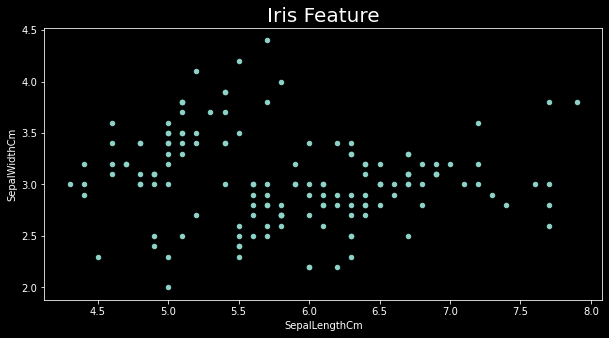

In [9]:
# Here we are using scatterplot for visualizing the Iris features.
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('dark_background')
Data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.title('Iris Feature', fontweight = 30, fontsize = 20)
plt.show()

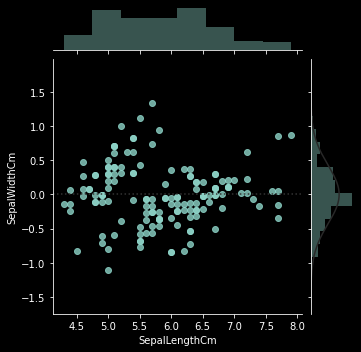

In [10]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=Data, size=5, kind= "resid")
plt.show()

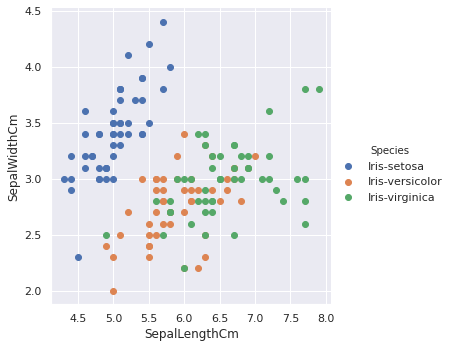

In [11]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.set(style="darkgrid", color_codes=True)
sns.FacetGrid(Data, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

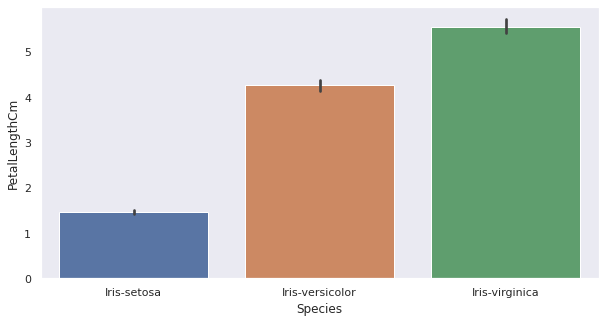

In [12]:
# We can look at an individual feature in Seaborn through a boxplot
sns.set(style="dark", color_codes=True)
sns.barplot(x="Species", y="PetalLengthCm", data=Data)
plt.show()

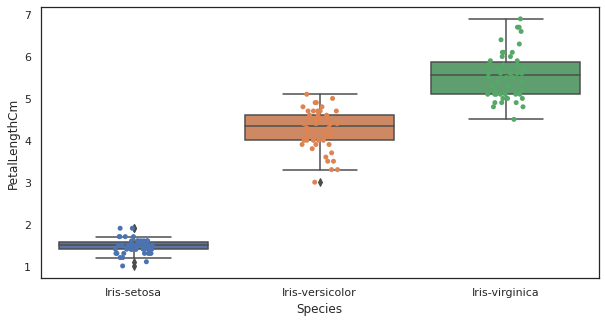

In [13]:
# there is One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
sns.set(style="white", color_codes=True)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=Data)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=Data, jitter=True, edgecolor="gray")

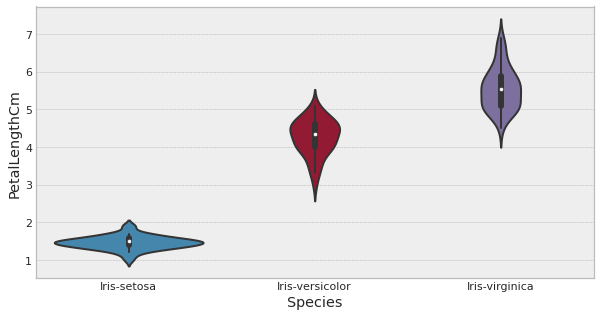

In [14]:
# here we are plotting violinplot as it give benifit by of the previous two plots and simplifies them
plt.style.use('bmh')
sns.violinplot(x="Species", y="PetalLengthCm", data=Data, size=6)
plt.show()

In [15]:
# frstly we will drop id column from our dataset
Data = Data.drop("Id",axis=1)

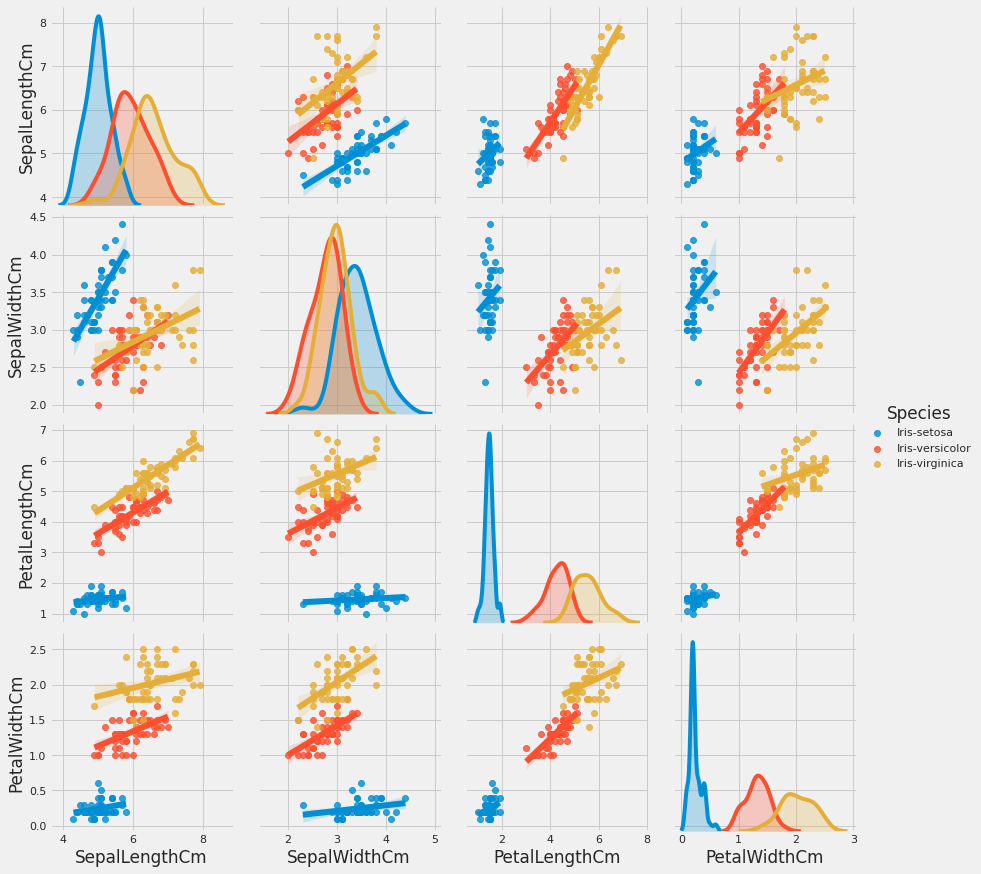

In [16]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# # From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
# here we are doing with regression
plt.style.use('fivethirtyeight')
sns.pairplot(Data, kind="reg",hue="Species", size=3)
plt.show()


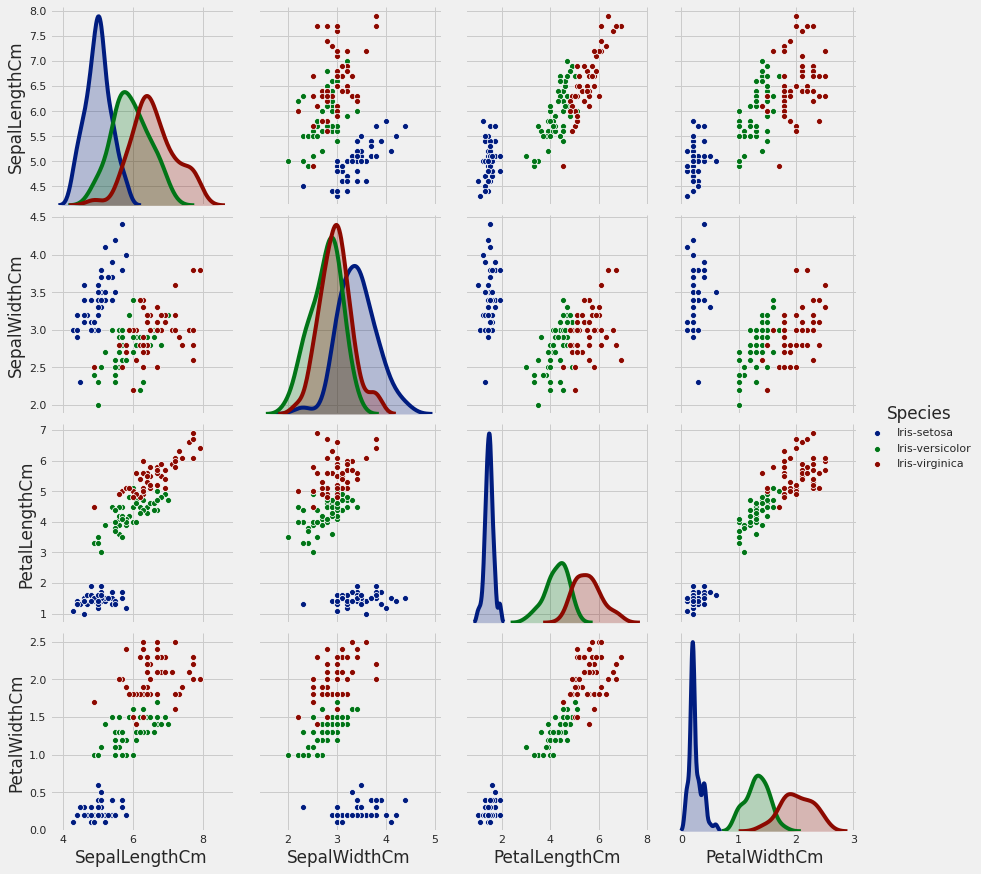

In [17]:
# here we are ploting same graph as above but withour regression
plt.style.use('seaborn-dark-palette')
sns.pairplot(Data, kind="scatter",hue="Species", size=3)
plt.show()


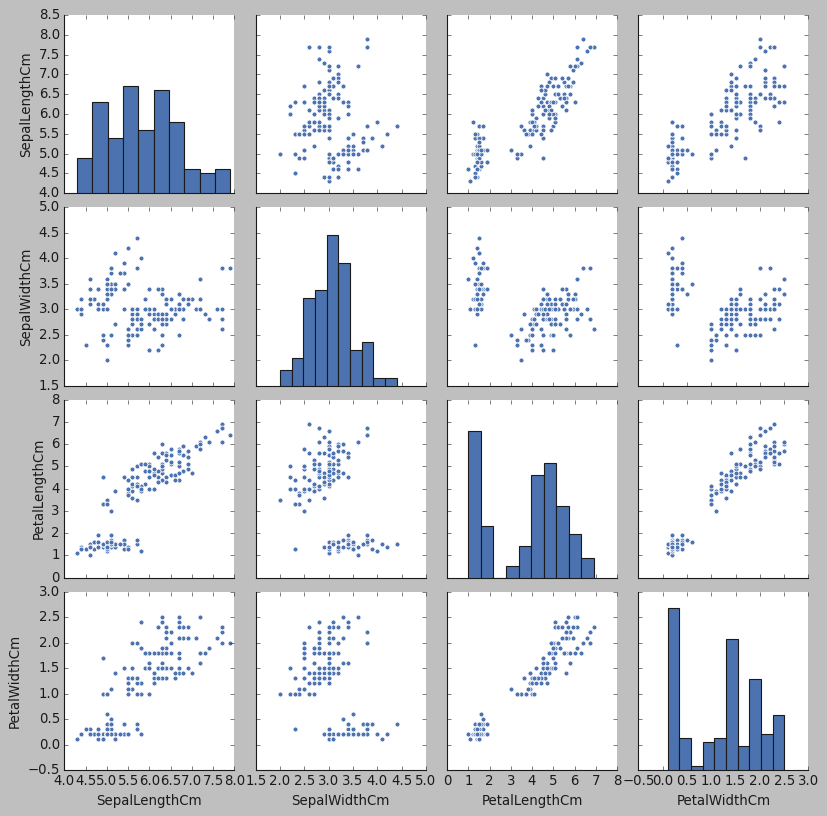

In [18]:
# here we are ploting same above graph but with histogram
plt.style.use('classic')
sns.pairplot(Data, diag_kind="hist")
plt.show()


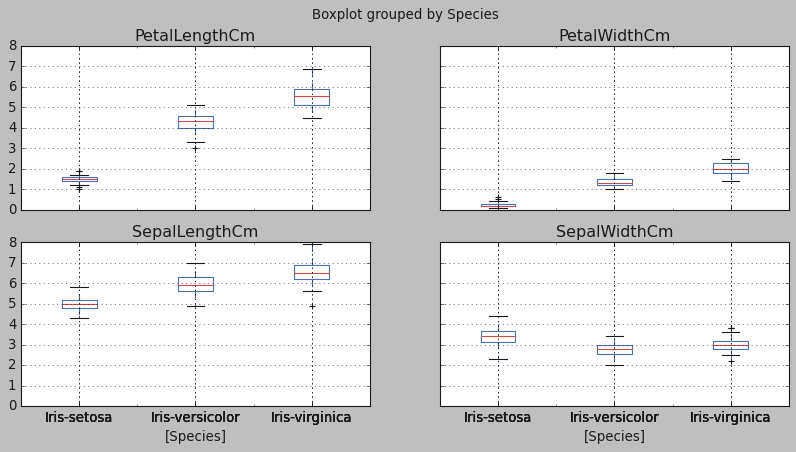

In [19]:
# Now we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species.
Data.boxplot(by="Species", figsize=(12, 6))
plt.show()

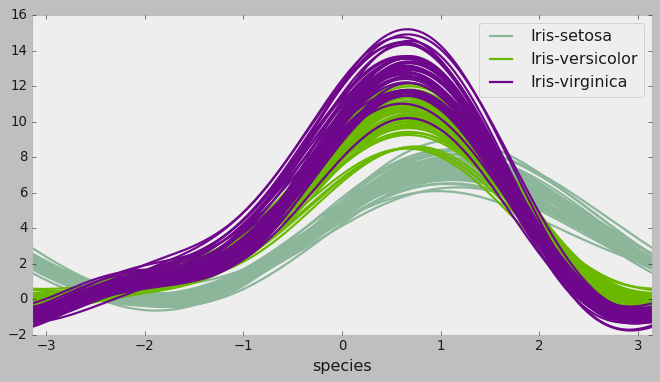

In [20]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
# here we are importing library for making andrews curves
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('bmh')
pd.plotting.andrews_curves(Data, 'Species')
plt.xlabel("species")
plt.show()


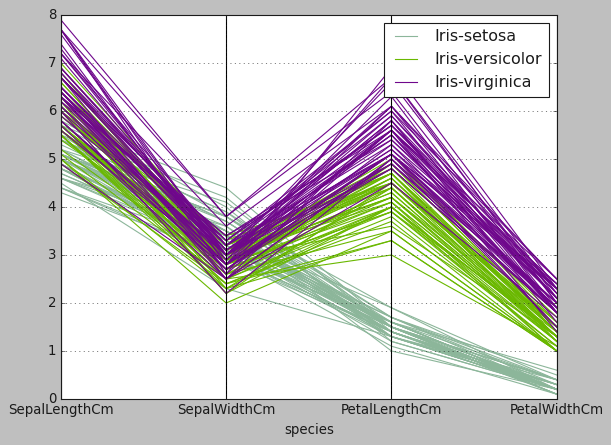

In [21]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
plt.style.use('classic')
pd.plotting.parallel_coordinates(Data, "Species")
plt.xlabel("species")
plt.show()

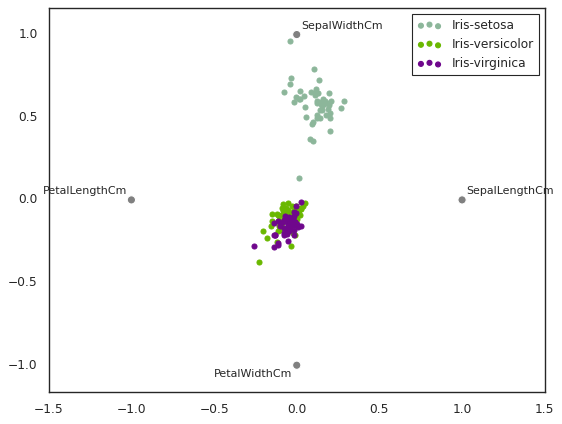

In [22]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
sns.set(style="white", color_codes=True)
pd.plotting.radviz(Data, "Species")
plt.show()

# Conclusion

In [ ]:
Thanks for reading. If you have any questions or suggestions, feel free to write them down in the comment section